#                           CMPE 279 Final Project Report

---


                             Submitted By : Zeba Wahab
                             SID:           016712566
      

# **Performance Evaluation of Encryption Algorithms:** ` AES,DES,RSA,ECC,QKD  `
---
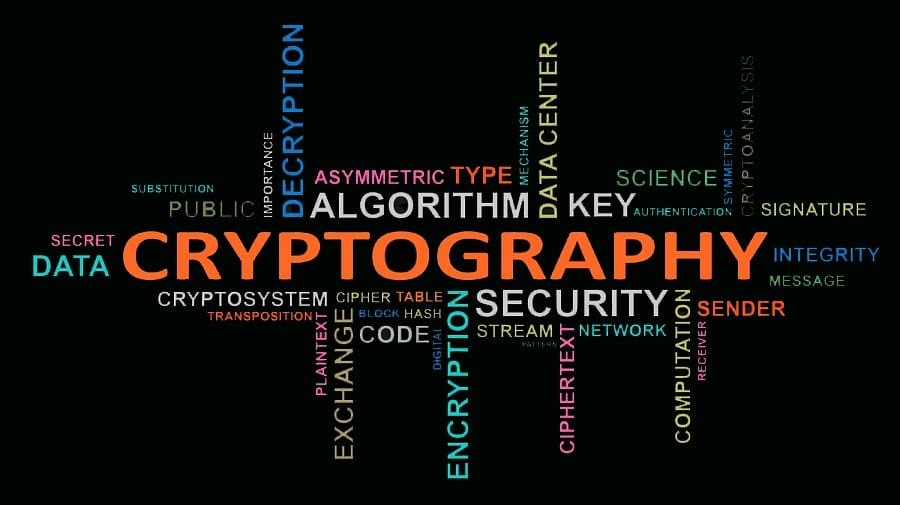
                        

## **Abstract**
----
Cryptographic algorithms ensure secure communication in the digital era, each offering unique advantages based on use cases. This report presents a comparative analysis of AES, DES, RSA, ECC, and QKD encryption techniques. Using Python implementations, the algorithms were evaluated for performance metrics such as encryption and decryption times. The results highlight the strengths and limitations of each method, providing insights into their real-world applicability.

##**1. Introduction**
------------------

The proliferation of sensitive data in modern applications necessitates robust encryption mechanisms. Symmetric algorithms (AES, DES) are well-suited for high-speed data transmission, while asymmetric algorithms (RSA, ECC) offer secure key exchanges. Quantum Key Distribution (QKD) represents the future of encryption, leveraging quantum mechanics to ensure unparalleled security. This study implements these algorithms, comparing their computational overhead and practical efficiency.


## **2. Methodology**
The implementation uses Python and the `cryptography` library. A dataset of messages simulates various input lengths to evaluate encryption times. Each algorithm was applied to the dataset, and its performance was measured using the following structure:
- Data Preprocessing
- Key generation.
- Encryption of the message.
- Decryption and result verification.
---




###2.1 Setup

In [ ]:
#Installing Required Dependencies
!pip install kaggle
!pip install pycryptodome cryptography


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.1 MB/s eta 0:00:00


In [ ]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

######**Note:**
Code to Connect colab to Kaggle for using the dataset directly.
*   If running in colab, Generate your API token in kaggle, download it and then upload the >json file here.
*   If running directly on Kaggle , change path accordingly and skip next few steps.

In [ ]:

from google.colab import files
files.upload()  # Click "Choose Files" and upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kragg033","key":"3da27d187241f97ab74d53045930cdaf"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fabiochiusano/medium-articles
!unzip medium-articles.zip -d medium-articles
!ls medium-articles

Dataset URL: https://www.kaggle.com/datasets/fabiochiusano/medium-articles
License(s): CC0-1.0
100% 369M/369M [00:13<00:00, 42.1MB/s]
100% 369M/369M [00:13<00:00, 29.6MB/s]
Archive:  medium-articles.zip
  inflating: medium-articles/medium_articles.csv  
medium_articles.csv


In [ ]:
# Adjust path here if using Kaggle
## loading dataset
df = pd.read_csv("medium-articles/medium_articles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      192363 non-null  object
 1   text       192368 non-null  object
 2   url        192368 non-null  object
 3   authors    192368 non-null  object
 4   timestamp  192366 non-null  object
 5   tags       192368 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


###2.2 Data Preprocessing and Evaluation

#####**Data Collection**
 The dataset, sourced from Kaggle, contains Medium blog articles. These articles provide a variety of textual data, making them suitable for testing encryption algorithms with different input sizes. The dataset's diversity in length and complexity allows us to assess the performance of each encryption algorithm effectively.
#####**Data preprocessing**
1.   `Remove Null or Empty Rows`:Any rows with missing or empty text are removed to avoid errors during encryption.
2.  `Remove Special Characters`:Strip unwanted characters that may not contribute to the encryption process.
3.   `Lowercase Conversion`:Convert all text to lowercase for consistency.
4.   `Limit Text Length`:Texts exceeding the maximum encryption length for RSA and ECC algorithms are truncated.
5.   `Prepare Final Dataset`:The preprocessed data is stored in a dataframe ready for encryption.

In [ ]:
##printing First few rows:
df.head()

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Missing Values:
title        5
text         0
url          0
authors      0
timestamp    2
tags         0
dtype: int64

Duplicate Rows:
0


In [ ]:
# Basic statistics of the dataset
print("\nBasic Statistics:")
df.describe(include='all')


Basic Statistics:


,title,text,url,authors,timestamp,tags
count,192363,192368,192368,192368,192366,192368
unique,187892,185474,192368,83915,191612,183380
top,by Martino Pietropoli,Learn more. Medium is an open platform where 1...,https://medium.com/invisible-illness/mental-no...,[],2019-03-13 14:21:44.055000+00:00,['Startup']
freq,93,1976,1,30955,22,80


######**Note:**
*  All the columns are combined together in a single string to be used as a secret message.




In [ ]:
# Merge columns into a single string to be used as Secret Message
def merge_columns(row):
    """
    Combine specified columns into a single string.
    """
    return ' '.join(
        filter(None, [str(row['title']), str(row['text']), str(row['url']), str(row['authors']), str(row['tags'])])
    )

# Apply merge_columns to create a new column
df['merged'] = df.apply(merge_columns, axis=1)

# Display a sample of the merged column
print("\nSample of Merged Column:")
print(df['merged'].head())


Sample of Merged Column:
0    Mental Note Vol. 24 Photo by Josh Riemer on Un...
1    Your Brain On Coronavirus Your Brain On Corona...
2    Mind Your Nose Mind Your Nose\n\nHow smell tra...
3    The 4 Purposes of Dreams Passionate about the ...
4    Surviving a Rod Through the Head You’ve heard ...
Name: merged, dtype: object


######**EDA: Analyze the merged data**
Inspect Dataset Structure:
Review the number of rows, columns, and data types to ensure compatibility with the encryption process. Identify the column containing the text to be encrypted. Check for Null or Missing Values.

Understanding the distribution of text lengths helps evaluate algorithm performance for short and long inputs.

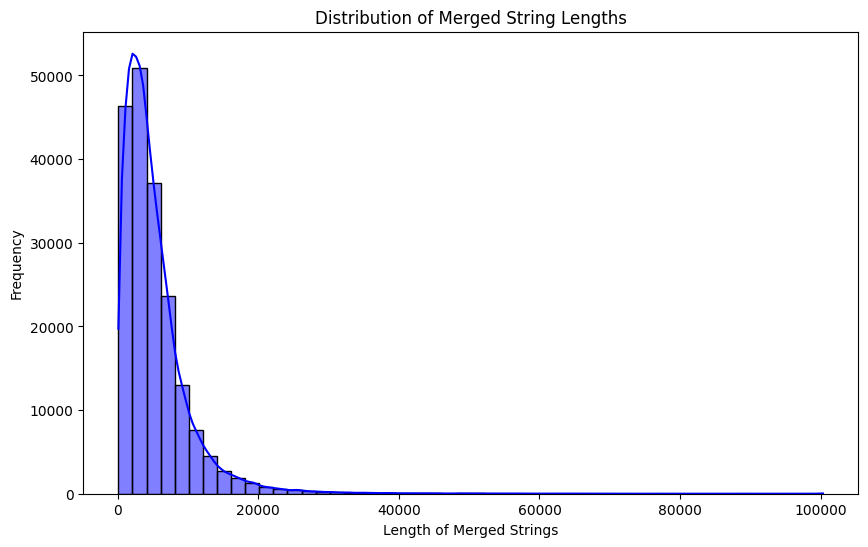

In [ ]:
# EDA: Analyze the merged data
# Length of merged strings
df['merged_length'] = df['merged'].apply(len)

# Distribution of merged string lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['merged_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Merged String Lengths')
plt.xlabel('Length of Merged Strings')
plt.ylabel('Frequency')
plt.show()



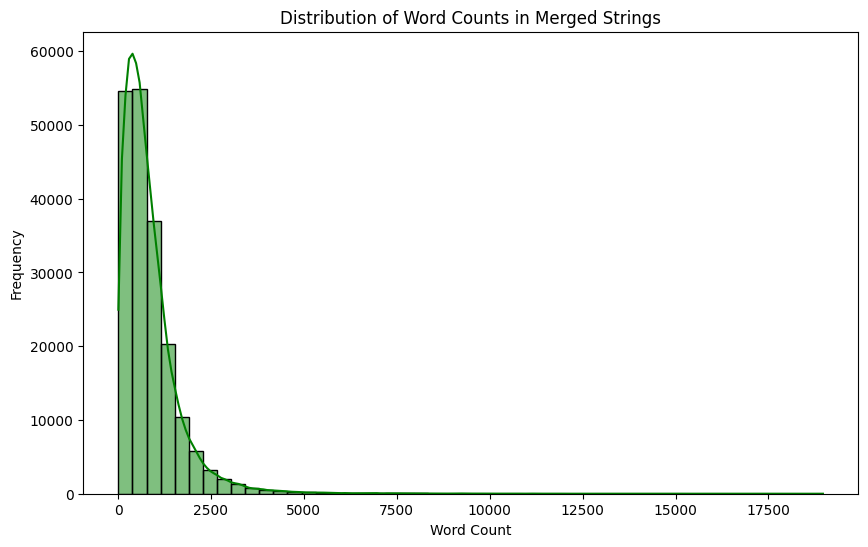

In [ ]:
# Word count in merged strings
df['word_count'] = df['merged'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='green')
plt.title('Distribution of Word Counts in Merged Strings')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


<ipython-input-20-3b638681297d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='viridis')


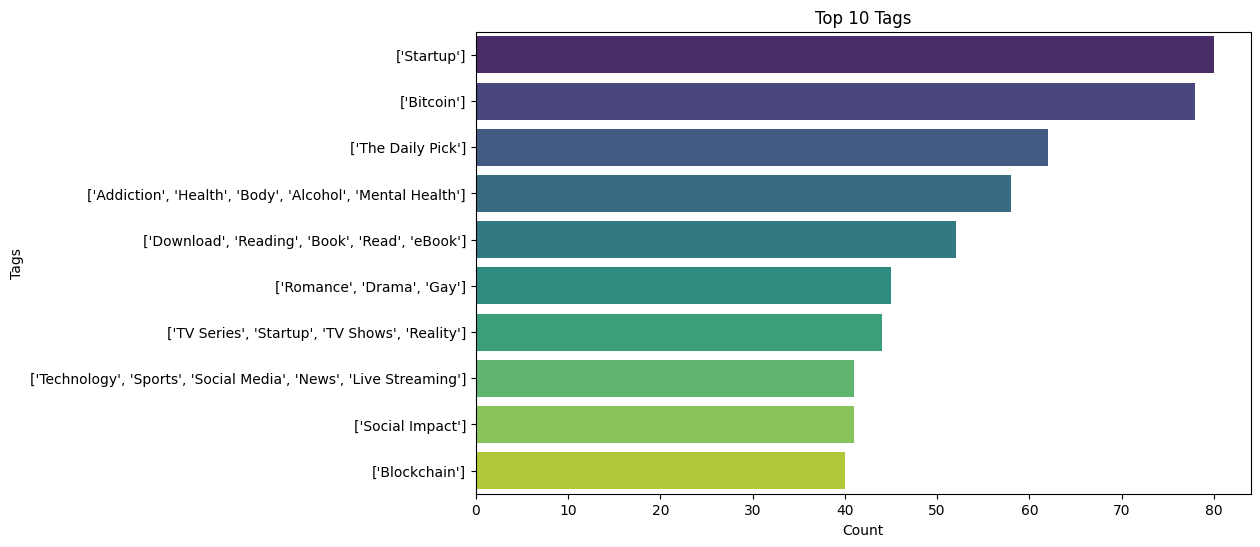

In [ ]:

# Top tags analysis
if 'tags' in df.columns:
    tag_counts = df['tags'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='viridis')
    plt.title('Top 10 Tags')
    plt.xlabel('Count')
    plt.ylabel('Tags')
    plt.show()

######**Note:**
*  All combined strings are cleaned by removing escape characters and unnecessary elements.
*   Strings of size `less than 100 characters` and `greater than 3500 characters` are dropped as they have very low frequency.




In [ ]:
import re

# Function to clean strings by removing escape characters and unnecessary elements
def clean_string(raw_string):
    # Replace escape characters and tabs with spaces
    cleaned = re.sub(r"[\n\t]", " ", raw_string)
    # Remove square brackets and single quotes
    cleaned = re.sub(r"[\[\]']", "", cleaned)
    # Remove extra spaces
    cleaned = re.sub(r"\s+", " ", cleaned).strip()
    return cleaned

# Clean the 'merged' column
df['merged'] = df['merged'].apply(clean_string)

# Remove "/" from strings in the 'merged' column
df['merged'] = df['merged'].str.replace('/', '', regex=False)

# Drop rows based on conditions
# Example 1: Drop rows where the 'title' column contains "Unknown"
if 'title' in df.columns:  # Check if 'title' exists
    df = df[df['title'] != "Unknown"]

# Example 2: Drop rows where the 'merged' column has less than 100 characters
df = df[df['merged'].str.len() >= 100]
# Example 2: Drop rows where the 'merged' column has less than 3500 characters
df = df[df['merged'].str.len() <=3500]

# Keep only the 'merged' column
df = df[['merged']]


In [ ]:
## Final preprocessed Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83695 entries, 3 to 192365
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   merged  83695 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [ ]:
df.head()

,merged
3,The 4 Purposes of Dreams Passionate about the ...
4,Surviving a Rod Through the Head You’ve heard ...
12,Facing Three Fundamental Coronavirus Fears 1. ...
15,The Ted Talk That Changed My Life The Simplest...
17,Exploring New York City Restaurants By Rashida...


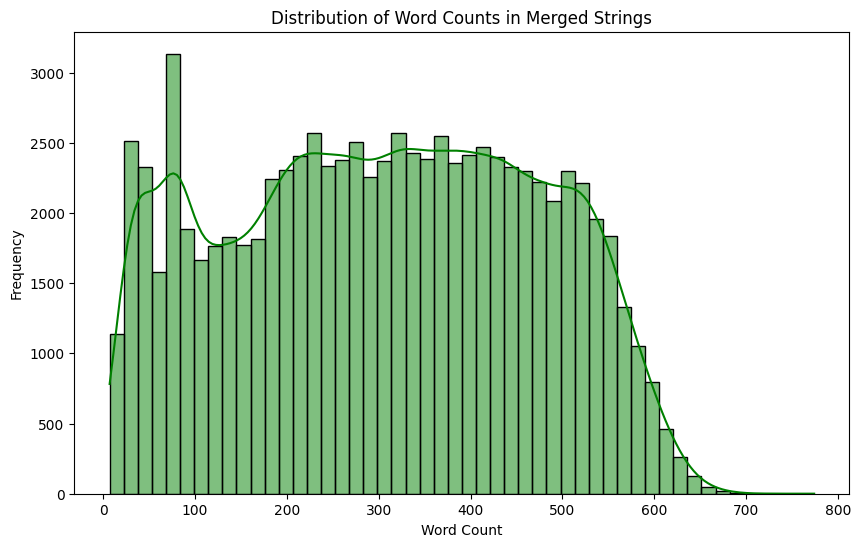

In [ ]:
# Word count in merged strings
df['word_count'] = df['merged'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='green')
plt.title('Distribution of Word Counts in Merged Strings')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

###2.3 Key Generation

- **AES**: A random 256-bit key was generated for encryption and decryption.
- **DES**: A random 64-bit key was used, demonstrating an older encryption standard.
- **RSA**: A 2048-bit private-public key pair was generated.
- **ECC**: A key pair was generated using the SECP384R1 curve.
- **QKD**: Simulated quantum-derived symmetric keys (256-bit) were used for encryption

###2.4 Encryption and Decryption Implementation

For each algorithm, encryption and decryption processes were implemented using libraries from the Python Cryptography module.

- **AES and DES**: Both algorithms used the Cipher Block Feedback (CFB) mode.
- **RSA**: Messages were encrypted with the public key and decrypted with the private key using Optimal Asymmetric Encryption Padding (OAEP).
- **ECC**: Used Elliptic Curve Diffie-Hellman (ECDH) to derive a shared key, followed by symmetric encryption with AES.
- **QKD**: Simulated with AES encryption using a QKD key.  

##  **3. Algorithms Used**
----------
**3.1 Advanced Encryption Standard (AES)**

AES is a symmetric encryption algorithm known for its speed and security. Using a fixed block size of `128` bits and key sizes of `128, 192, or 256` bits, it ensures robust encryption.

- **Pros**: High speed, widely adopted, strong security.
- **Cons**: Shared key management challenges.

In [ ]:
##importing all required packages for crypto algorithms
import time
import os
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.asymmetric import rsa, ec
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

In [34]:
def generate_aes_key():
    return os.urandom(32)  # 256-bit key

def aes_encrypt_decrypt(message, key):
    iv = os.urandom(16)  # 128-bit IV
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(message.encode()) + encryptor.finalize()

    decryptor = cipher.decryptor()
    decrypted_message = decryptor.update(ciphertext) + decryptor.finalize()
    return ciphertext, decrypted_message



**3.2 Data Encryption Standard (DES)**   

DES is an older symmetric encryption method using a `64-bit block size` and `56-bit keys`. It is largely obsolete due to vulnerabilities to brute-force attacks.

- **Pros**: Simple implementation.
- **Cons**: Weak security against modern attacks.

In [35]:

def generate_des_key():
    return os.urandom(8)  # 64-bit key


def des_encrypt_decrypt(message, key):
    iv = os.urandom(8)  # 64-bit IV
    cipher = Cipher(algorithms.TripleDES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(message.encode()) + encryptor.finalize()

    decryptor = cipher.decryptor()
    decrypted_message = decryptor.update(ciphertext) + decryptor.finalize()
    return ciphertext, decrypted_message

**3.3 Rivest–Shamir–Adleman (RSA)**

RSA is an asymmetric encryption algorithm that uses public and private keys for secure data transmission. It is widely used in digital signatures and secure communications.Uses Key Size of ` 2048 bits or higher`

- **Pros**: Strong security, suitable for key exchange.
- **Cons**: Slower than symmetric algorithms.


In [ ]:
# RSA key initialization
rsa_private_key = rsa.generate_private_key(
    public_exponent=65537, key_size=2048, backend=default_backend()
)
rsa_public_key = rsa_private_key.public_key()
def rsa_encrypt_decrypt(message):
    # Generate a random AES key for message encryption
    aes_key = generate_aes_key()

    # Encrypt the message using AES
    ciphertext, _ = aes_encrypt_decrypt(message, aes_key)

    # Encrypt the AES key using RSA
    encrypted_aes_key = rsa_public_key.encrypt(
        aes_key,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

    # Decrypt the AES key using RSA
    decrypted_aes_key = rsa_private_key.decrypt(
        encrypted_aes_key,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

    # Verify the decrypted AES key matches the original
    if decrypted_aes_key != aes_key:
        raise ValueError("Decryption failed: AES key mismatch.")

    # Decrypt the message using the decrypted AES key
    _, decrypted_message = aes_encrypt_decrypt(message, decrypted_aes_key)

    # Return the final ciphertext and decrypted message
    return ciphertext, decrypted_message


**3.4 Elliptic Curve Cryptography (ECC)**

ECC is an asymmetric encryption algorithm that offers similar security to RSA but with smaller key sizes, making it efficient for mobile and IoT applications.`Key Size: Varies; e.g., 256 bits provides equivalent security to 3072-bit RSA`

- **Pros**: High efficiency, small key sizes.
- **Cons**: Complex implementation.

In [36]:
# ECC key initialization
ecc_private_key = ec.generate_private_key(ec.SECP384R1(), default_backend())
ecc_public_key = ecc_private_key.public_key()

def ecc_encrypt_decrypt(message):
    # ECC does not directly encrypt messages; using ECDH with shared key (simplified for demonstration)
    shared_key = ecc_private_key.exchange(ec.ECDH(), ecc_public_key)

    # Derive a symmetric key from shared key (simplified using AES for example)
    aes_key = PBKDF2HMAC(
        algorithm=hashes.SHA256(),
        length=32,
        salt=b"some_salt",  # Fixed salt for demonstration purposes
        iterations=5000,  # this value affects the execution time
        backend=default_backend()
    ).derive(shared_key)

    ciphertext, plaintext = aes_encrypt_decrypt(message, aes_key)
    return ciphertext, plaintext

**3.5 Quantum Key Distribution (QKD)**

 Simulating QKD, a quantum-derived symmetric key encrypts and decrypts messages.`Key Size: Not applicable; relies on quantum mechanics.`

- **Pros**: Theoretical security based on quantum mechanics.
- **Cons**: Requires advanced hardware, currently in experimental stages.


In [37]:

# Simulated QKD key generation
def qkd_key():
    return os.urandom(32)  # Simulated quantum-derived symmetric key

def qkd_encrypt_decrypt(message, key):
    return aes_encrypt_decrypt(message, key)  # Using AES with QKD key

######**Function to take merged strings as input and perform encrytion/decryption for comparision.**


In [38]:
# Process messages and measure performance
def process_messages(input_df):
    results = []

    aes_key = generate_aes_key()
    des_key = generate_des_key()
    qkd_shared_key = qkd_key()

    for message in input_df['merged']:
        row = {"Message": message}

        # AES
        start = time.time()
        aes_encrypt_decrypt(message, aes_key)
        row["AES"] = time.time() - start

        # DES
        start = time.time()
        des_encrypt_decrypt(message, des_key)
        row["DES"] = time.time() - start

        # RSA
        start = time.time()
        rsa_encrypt_decrypt(message)
        row["RSA"] = time.time() - start

        # ECC
        start = time.time()
        ecc_encrypt_decrypt(message)
        row["ECC"] = time.time() - start

        # QKD
        start = time.time()
        qkd_encrypt_decrypt(message, qkd_shared_key)
        row["QKD"] = time.time() - start

        results.append(row)

    return pd.DataFrame(results)

In [39]:
# Process messages
results_df = process_messages(df)


<ipython-input-35-ae070260eaa4>:7: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  cipher = Cipher(algorithms.TripleDES(key), modes.CFB(iv), backend=default_backend())


## **4. Results and Evaluation**
Performance metrics for each algorithm were evaluated on a dataset of simulated messages. The average encryption and decryption times (in seconds) were visualized using logarithmic scale plots for clarity.

Visualization Used:
- Bar chart for average times.
- Line chart showing time variations for each message.

---



######**Function to Analyze the performance of all algorithms using visualization**

In [47]:
# Analyze and visualize results
def analyze_results(results_df):
    metrics = {}
    for algorithm in ["AES", "DES", "RSA", "ECC", "QKD"]:
        times = results_df[algorithm]
        metrics[algorithm] = {
            "Average": np.mean(times),
            "Minimum": np.min(times),
            "Maximum": np.max(times)
        }

    print("Performance Metrics:")
    for algo, metric in metrics.items():
        print(f"{algo}: Avg={metric['Average']:.6f}s, Min={metric['Minimum']:.6f}s, Max={metric['Maximum']:.6f}s")

    # Bar chart for average times (logarithmic scale)
    plt.figure(figsize=(10, 6))
    algorithms = list(metrics.keys())
    averages = [metrics[algo]["Average"] for algo in algorithms]
    plt.bar(algorithms, averages, color=["blue", "green", "red", "purple", "orange"])
    plt.title("Average Encryption Time per Algorithm (Log Scale)")
    plt.ylabel("Time (s, log scale)")
    plt.xlabel("Algorithm")
    plt.yscale("log")  # Set y-axis to logarithmic scale
    plt.grid(axis="y", which="both", linestyle="--", linewidth=0.5)
    plt.show()

    # Line plots for time variation (logarithmic scale)
    plt.figure(figsize=(12, 6))
    for algorithm in ["AES", "DES", "RSA", "ECC", "QKD"]:
        plt.plot(results_df[algorithm], label=algorithm)
    plt.title("Encryption Time Variation per Message (Log Scale)")
    plt.ylabel("Time (s, log scale)")
    plt.xlabel("Message Index")
    plt.yscale("log")  # Set y-axis to logarithmic scale
    plt.legend()
    plt.grid(which="both", linestyle="--", linewidth=0.5)
    plt.show()

Performance Metrics:
AES: Avg=0.000060s, Min=0.000027s, Max=0.004349s
DES: Avg=0.000294s, Min=0.000062s, Max=0.014761s
RSA: Avg=0.001480s, Min=0.000931s, Max=0.019909s
ECC: Avg=0.010737s, Min=0.007910s, Max=0.128543s
QKD: Avg=0.000065s, Min=0.000028s, Max=0.004772s


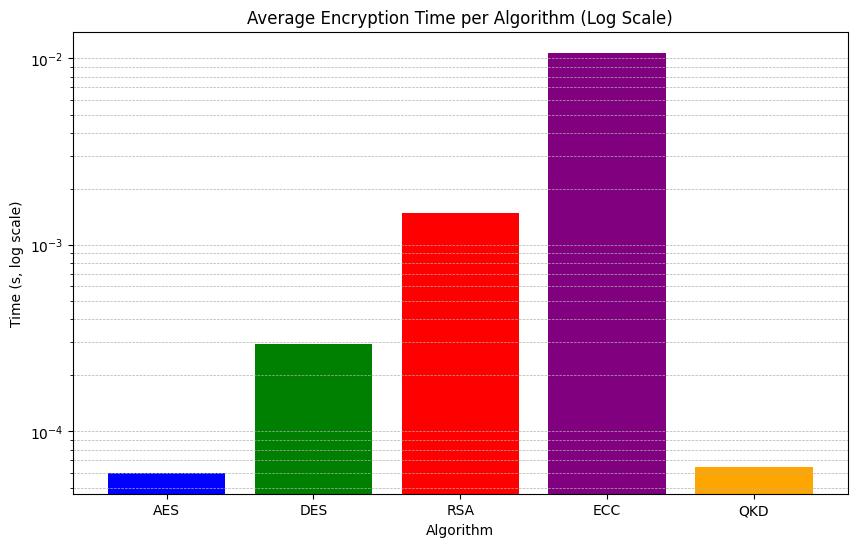

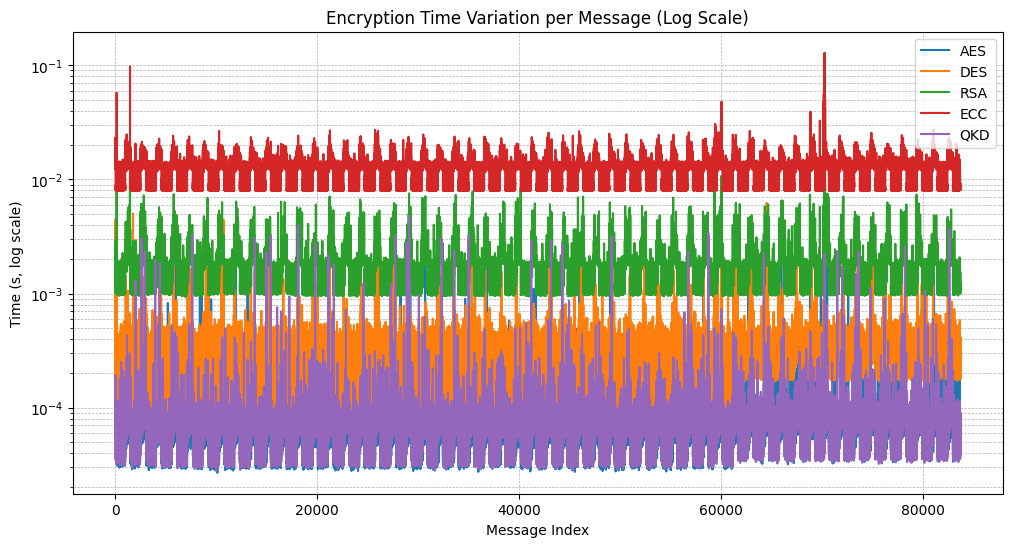

In [48]:
# Analyze results
analyze_results(results_df)

In this study, we evaluated the performance of five encryption algorithms: `AES, DES, RSA, ECC, and QKD`. Our analysis focused on encryption speed and key distribution security. The key observations and recommendations derived from the results are presented below.

######**4.1.Key Observations:**

-**`AES Outperforms All Other Algorithms in Speed for Encryption:`** Our experiments demonstrated that AES consistently achieved the highest encryption and decryption speeds compared to the other algorithms tested. This superior performance is attributed to AES's optimization for modern systems, striking a balance between speed and security.

-**`QKD Shows Promise for Key Distribution:`** Although QKD exhibited faster key distribution than traditional symmetric and asymmetric algorithms, it is crucial to note that its primary purpose is secure key exchange rather than data encryption.

-**`Asymmetric Algorithms (RSA, ECC) Are Computationally Intensive:`** Our findings revealed that RSA and ECC were significantly slower than symmetric algorithms. This performance difference is primarily due to their reliance on computationally demanding operations such as modular exponentiation and elliptic curve computations.

-**`DES Is Obsolete:`** In comparison to AES, DES was found to be both slower and less secure, rendering it unsuitable for most contemporary applications.


######**4.2.Recommendations for Use:**

-**`AES:`** Due to its speed and robust security, AES is recommended as the preferred choice for general-purpose encryption.

-**`QKD:`** QKD is particularly well-suited for secure key distribution, especially in sensitive or high-security environments.

-**`RSA and ECC:`** While RSA and ECC offer strong security, their computational overhead should be carefully considered. Their use is recommended for applications where security is paramount, and performance is a secondary concern.

-**`DES:`** DES is deprecated and should not be used in new systems. Existing systems employing DES should be migrated to more secure alternatives, such as AES.


######**4.3.Further Evaluation:**
While this study provides valuable insights into the performance characteristics of the evaluated algorithms, further evaluation is warranted to assess their suitability for specific use cases. Future research could focus on evaluating the algorithms' performance in different contexts, such as cloud computing, mobile devices, and Internet of Things (IoT) networks.



## **5. Conclusion**
---
The evaluation highlights the trade-offs between speed, security, and purpose. Symmetric algorithms like AES are well-suited for speed-critical applications, whereas asymmetric algorithms like RSA and ECC are more secure but computationally expensive. QKD stands out as a potential future technology for ultra-secure communication.



## **6. References**
-------
1. M. Paradesi Priyanka et al., "A Comparative Review between Modern Encryption Algorithms viz. DES, AES, and RSA," 2022 International Conference on Computational Intelligence and Sustainable Engineering Solutions (CISES), Greater Noida, India, 2022, pp. 295-300, doi: 10.1109/CISES54857.2022.9844393. keywords: {Privacy;Memory;Information security;Receivers;Information processing;Encryption;Internet;Encryption;Decryption;AES;DES;3DES;RSA},
2.   P. Kumar Tiwari, V. Choudhary and S. Raj Aman, "Analysis and Comparison of DES, AES, RSA Encryption Algorithms," 2022 4th International Conference on Advances in Computing, Communication Control and Networking (ICAC3N), Greater Noida, India, 2022, pp. 1913-1918, doi: 10.1109/ICAC3N56670.2022.10073996. keywords: {Computer hacking;Public key;Receivers;Encryption;AES;DES;Symmetric EET;DET;public key encryption;RSA;cryptography;public key cryptography;DES encryption},
3.  Notes on Cryptography Ciphers: RSA, DSA, AES, RC4, ECC, ECDSA, SHA, and so on … – rakhesh.com
4.  https://www.pycryptodome.org/
5.   https://www.bing.com/images/search?view=detailV2&ccid=HFSNz%2FKY&id=08A434878ED592A4DC4A355AED8C9C4AF7044429&thid=OIP.HFSNz_KYhMq__pJa5vOuNwHaEJ&mediaurl=https%3A%2F%2Fmedia.licdn.com%2Fdms%2Fimage%2FD5612AQGDKhZPs-jXMw%2Farticle-cover_image-shrink_600_2000%2F0%2F1701959179280%3Fe%3D2147483647%26v%3Dbeta%26t%3D80_Lsx4v8mjJ9Nx0qWCnuHOXCNuvAn0vZsul6Cs_fCc&cdnurl=https%3A%2F%2Fth.bing.com%2Fth%2Fid%2FR.1c548dcff29884cabffe925ae6f3ae37%3Frik%3DKUQE90qcjO1aNQ%26pid%3DImgRaw%26r%3D0&exph=505&expw=900&q=crypography+image&simid=608007773352241726&form=IRPRST&ck=983D9112FF9DFA055C9C1E195FE7E54B&selectedindex=3&itb=0&cw=1225&ch=596&ajaxhist=0&ajaxserp=0&vt=0&sim=11&mid=FA6C7001CA76C0756004FA6C7001CA76C0756004



